# <a id='toc1_'></a>[analyze data](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [analyze data](#toc1_)    
  - [condensed data](#toc1_1_)    
  - [🕹️ interactive](#toc1_2_)    
  - [descriptive stats](#toc1_3_)    
  - [slides](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import os
import pandas as pd
from pathlib import Path
from pandas_plots import tbl, pls, hlp
import duckdb as ddb

hlp.show_package_version(["pygwalker"])

os.environ["THEME"]="light"

dir_data_in=Path("../data/in")
dir_data_out=Path("../data/out")

con = ddb.connect()

🐍 3.12.2 | 📦 pygwalker: 0.4.9.14 | 📦 pandas: 2.2.3 | 📦 numpy: 1.26.4 | 📦 duckdb: 1.2.0 | 📦 pandas-plots: 0.12.15 | 📦 connection_helper: 0.8.14


## <a id='toc1_1_'></a>[condensed data](#toc0_)
- defined columns have been transformed

🔵 *** df: condensed ***
🟣 shape: (195, 70) columns: ['Participant ID' '[01.01] CTCAE' '[01.02] Datum_AE'
 '[01.03] Sportassoziation' '[02.01] Datum_Aufnahme' '[02.02] Art'
 '[02.03] Auslöser' '[02.04] Körperteil' '[03.01.01] Schmerzen_Intensität'
 '[03.01.02] Schmerzen_Dauer' '[03.01] Schmerzen_Folge'
 '[03.02.01] Krankenhaus_Intensität ' '[03.02.02] Krankenhaus_Dauer'
 '[03.02] Krankenhaus_Folge' '[03.03.01] Med_Weiterbehandlung_Intensität'
 '[03.03.02] Med_Weiterbehandlung_Dauer'
 '[03.03] Med_Weiterbehandlung_Folge'
 '[03.04.01] Therapieprotokoll_Intensität'
 '[03.04.02] Therapieprotokoll_Dauer' '[03.04] Therapieprotokoll_Folge'
 '[03.05.01] Lebensnotwendige_Intenvention_Intensität'
 '[03.05.02] Folgen - Wie oft wurde die lebensnotwendige Intervention wiederholt?'
 '[03.05] Lebensnotwendige_Intenvention_Folge'
 '[03.06.01] Pflege_Intensität' '[03.06.02] Pflege_Dauer'
 '[03.06] Pflege_Folge' '[03.07.01] Medikamente_Dauer'
 '[03.07.02] Medikamente_Intensität' '[03.07] Medikamente_Folg

,Participant ID,[01.01] CTCAE,[01.02] Datum_AE,[01.03] Sportassoziation,[02.01] Datum_Aufnahme,[02.02] Art,[02.03] Auslöser,[02.04] Körperteil,[03.01.01] Schmerzen_Intensität,[03.01.02] Schmerzen_Dauer,...,[05.04] Online,[05.05] Testung,[05.06] Setting,[05.07] Motorik,[05.08] Hälfte,[05.09] Trainingszustand,[06.01] Freitext_Auslöser,[07.01] Standort,[07.04] Freitext_Medikaments,[07.07] Freitext_Observieren
0,3,2,Das AE war vor dem Sport bereits vorhanden und...,No,2022-10-01,Übelkeit/ Erbrechen,Physische Belastung|Med. Therapie,Internistisch,NaN,<NA>,...,No,No,Klinikflur,Koordination,2. Hälfte,2 Durchschnittlich,Beim moderaten Tischtennisspielen wurde der Pa...,Essen,nan,<NA>
1,4,1,Das AE ist neu aufgetreten.,Yes,2022-10-01,Schmerzen,Koordinationsprobleme,Rücken|Gesäß,2.0,Schmerzen am gleichen Tag,...,No,No,Klinikflur,Koordination,1. Hälfte,1 Gut,Luftballonspiel im Stehen; Kind hat sich gestr...,Essen,nan,<NA>
2,5,2,Das AE war vor dem Sport bereits vorhanden und...,No,2022-11-01,Kreislaufprobleme,Med. Therapie,Internistisch,NaN,<NA>,...,No,No,Pat.-Zimmer,Koordination,2. Hälfte,3 Mäßig|5 Anmerkung,Beim leichter Mobilisation und Aktivierung hat...,Essen,nan,<NA>


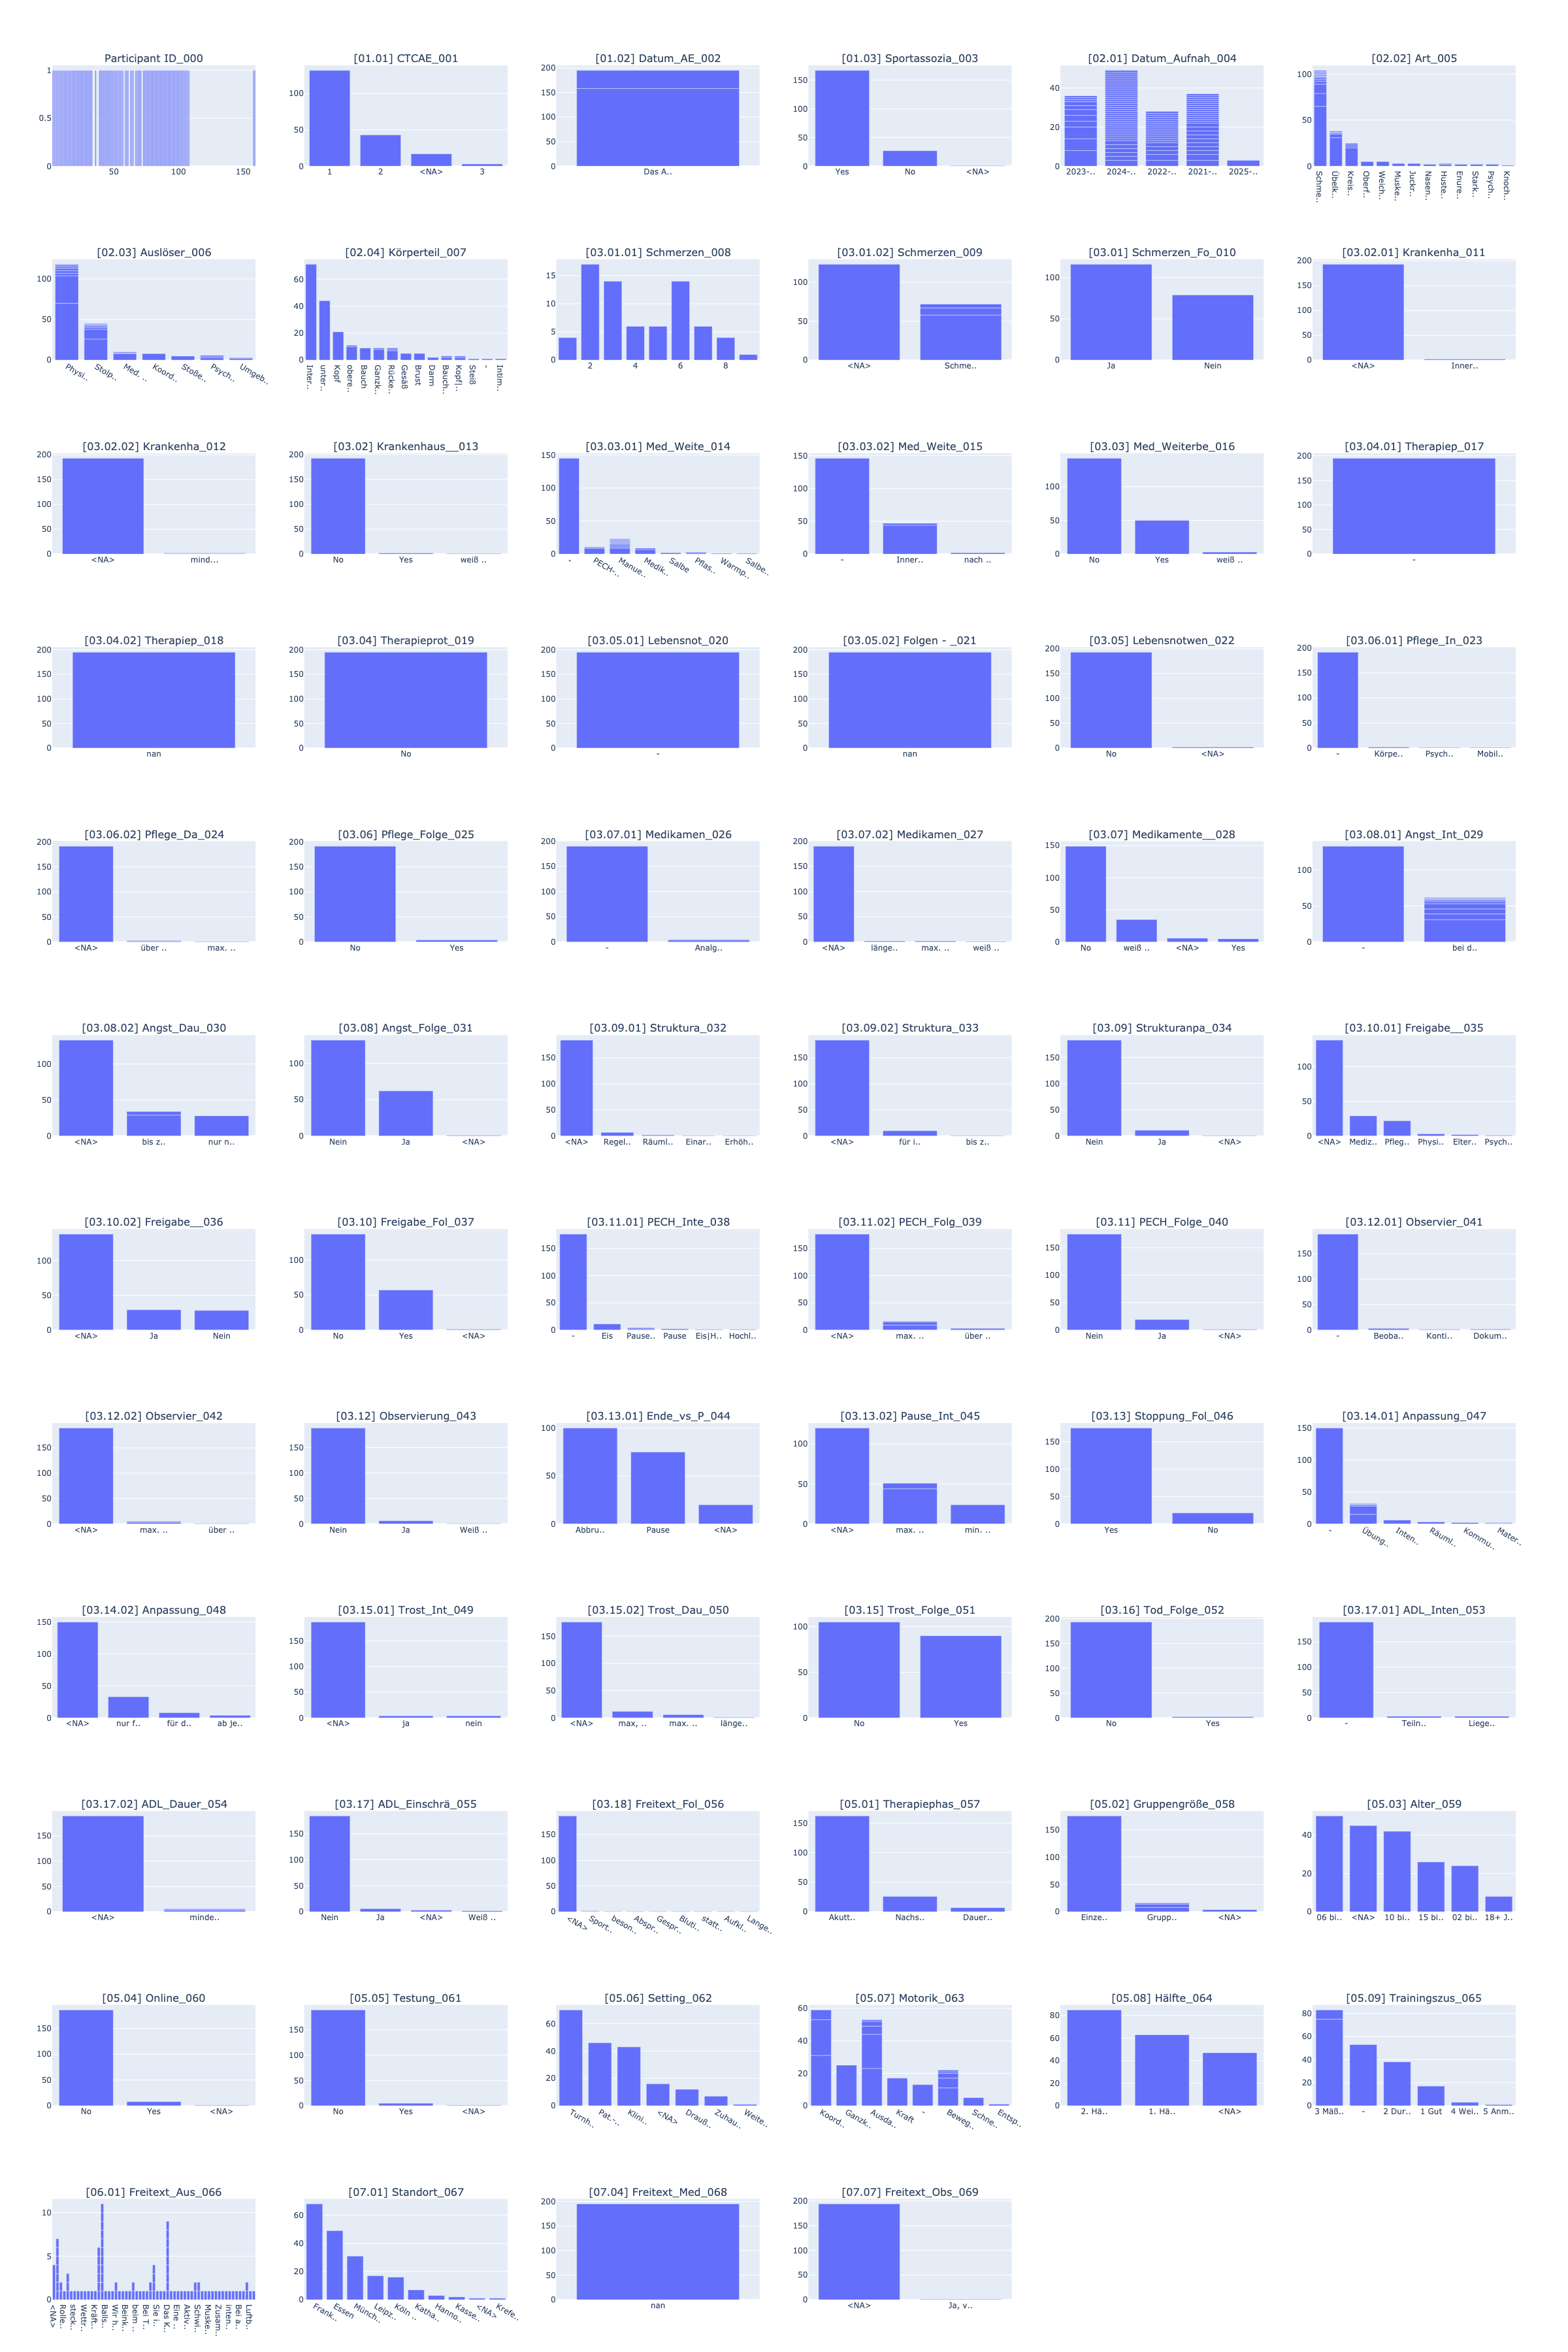

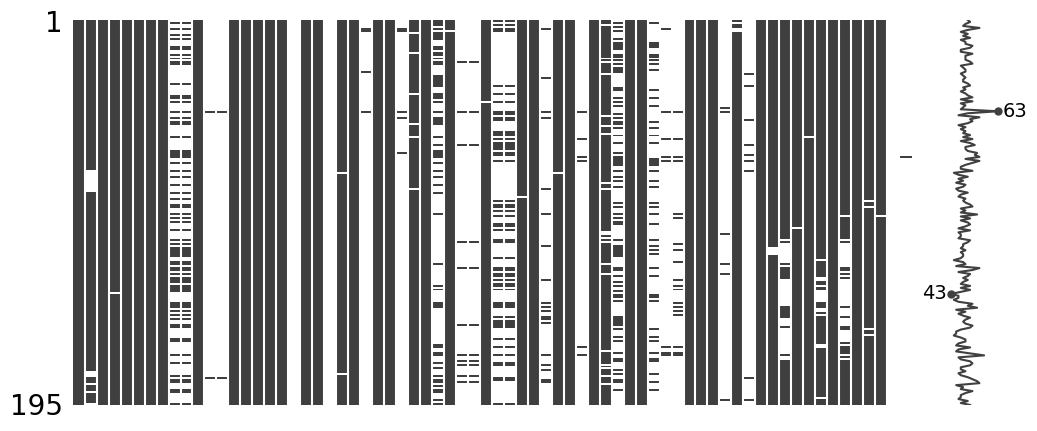

In [2]:
df_csv_condensed = (
    pd.read_csv(
        dir_data_out / "df_csv_condensed.csv",
        sep=";",
        encoding="utf-8-sig",
        index_col=None,
    )
)

# * CTCAE should be a string with integer values and MUST have <NA> as NA
df_csv_condensed["[01.01] CTCAE"] = (df_csv_condensed["[01.01] CTCAE"]
        .astype("Int64")
        .astype(str)
        .replace("<NA>", pd.NA)
)

# * mark columns that should be str instead of float, fuzzy
# col_int = hlp.find_cols(all_cols=df_csv_condensed.columns, stubs=["[01.01]"])

# df_csv_condensed = df_csv_condensed.astype({col_int[0]: "Int64"}).astype(
#     {col_int[0]: str}
# )


tbl.describe_df(
    df_csv_condensed,#.iloc[:, :],
    "condensed",
    top_n_uniques=5,
    top_n_chars_in_index=5,
    use_plot=True,
    top_n_chars_in_columns=20,
    use_missing=True,
    fig_cols=6,
)

## <a id='toc1_2_'></a>[🕹️ interactive](#toc0_)

In [3]:
if False:
    import pygwalker as pyg 
    
    _df = df_csv_condensed.astype(str)#.sort_index(axis=1)

    _=pyg.walk(
        dataset=_df,
        appearance=os.getenv("THEME"),
        kernel_computation=True,
    )

## <a id='toc1_3_'></a>[descriptive stats](#toc0_)

In [4]:
stubs = (
        "[01.01]",
        "[01.02]",
        "[01.03]",
        "[02.02]",
        "[02.03]",
        "[02.04]",
        "[03.02]",
        "[03.03]",
        "[03.04]",
        "[03.06]",
        "[03.07]",
        "[03.08]",
        "[03.09]",
        "[03.10]",
        "[03.10.01]",
        "[03.11]",
        "[03.11.02]",
        "[03.12]",
        "[03.13]",
        "[03.13.01]",
        "[03.13.02]",
        "[03.14]",
        "[03.14.01]",
        "[03.14.02]",
        "[03.15]",
        "[03.17]",
        "[05.01]",
        "[05.02]",
        "[05.03]",
        "[05.04]",
        "[05.05]",
        "[05.06]",
        "[05.07]",
        "[05.08]",
        "[05.09]",
        )
cols = hlp.find_cols(all_cols=df_csv_condensed.columns, stubs=stubs)
# cols

In [5]:
# n = len(df_csv_condensed)

# for col in cols:
#     if df_csv_condensed[col].dtype.kind in ("O"):
#         df = (df_csv_condensed[col]
#             .str.split("|")
#             .explode()
#             .value_counts()
#             .to_frame()
#             .rename(columns={"count": "cnt"})
#             .assign(pct=lambda x: x["cnt"] / n)
#             .round({"pct": 2})
#         )
#         con.from_df(df.reset_index()).show()

In [6]:
# # * loop over all selected columns
for col in cols:

    # * skip CTCAE and columns that are not str
    if col != "[01.01] CTCAE" and df_csv_condensed[col].dtype.kind in ("O"):

        # * slice
        df = df_csv_condensed[[col, "[01.01] CTCAE"]].copy()
        print(col)

        # * split to create arrays in cells, then explode to have atomic values
        df[col] = df[col].str.split("|")
        df = df.explode(col)

        # * to pivot
        display(
            tbl.pivot_df(
                df=df,
                dropna=False,
                data_bar_axis="x",
            )
        )

[01.02] Datum_AE


[01.01] CTCAE,1,2,3,,Total
[01.02] Datum_AE,,,,,
Das AE ist neu aufgetreten.,109 (55.9%),35 (17.9%),2 (1.0%),12 (6.2%),158 (81.0%)
Das AE war vor dem Sport bereits vorhanden und hat sich verstärkt.,23 (11.8%),8 (4.1%),1 (0.5%),5 (2.6%),37 (19.0%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[01.03] Sportassoziation


[01.01] CTCAE,1,2,3,,Total
[01.03] Sportassoziation,,,,,
,1 (0.5%),0,0,0,1 (0.5%)
No,19 (9.7%),7 (3.6%),1 (0.5%),0,27 (13.8%)
Yes,112 (57.4%),36 (18.5%),2 (1.0%),17 (8.7%),167 (85.6%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[02.02] Art


[01.01] CTCAE,1,2,3,,Total
[02.02] Art,,,,,
Enuresis,2 (0.8%),0,0,0,2 (0.8%)
Hustenanfall,4 (1.6%),0,0,0,4 (1.6%)
Juckreiz,3 (1.2%),1 (0.4%),0,0,4 (1.6%)
Knochenverletzungen,0,0,2 (0.8%),0,2 (0.8%)
Kreislaufprobleme,28 (11.1%),2 (0.8%),0,4 (1.6%),34 (13.4%)
Muskelkater,4 (1.6%),2 (0.8%),0,0,6 (2.4%)
Muskelkrämpfe,1 (0.4%),0,0,2 (0.8%),3 (1.2%)
Nasenbluten,1 (0.4%),1 (0.4%),0,0,2 (0.8%)
Oberflächliche Verletzungen,7 (2.8%),8 (3.2%),0,2 (0.8%),17 (6.7%)


[02.03] Auslöser


[01.01] CTCAE,1,2,3,,Total
[02.03] Auslöser,,,,,
Koordinationsprobleme,14 (4.5%),8 (2.6%),1 (0.3%),2 (0.6%),25 (8.1%)
Med. Therapie,67 (21.7%),11 (3.6%),0,8 (2.6%),86 (27.8%)
Physische Belastung,93 (30.1%),17 (5.5%),2 (0.6%),9 (2.9%),121 (39.2%)
Psychische Belastung,11 (3.6%),2 (0.6%),0,0,13 (4.2%)
"Stolpern, Ausrutschen, Fallen",21 (6.8%),19 (6.1%),1 (0.3%),4 (1.3%),45 (14.6%)
"Stoßen, Rempeln",7 (2.3%),2 (0.6%),0,1 (0.3%),10 (3.2%)
Umgebungsbedingungen,5 (1.6%),2 (0.6%),0,1 (0.3%),8 (2.6%)
Weitere,1 (0.3%),0,0,0,1 (0.3%)
Total,219 (70.9%),61 (19.7%),4 (1.3%),25 (8.1%),309 (100.0%)


[02.04] Körperteil


[01.01] CTCAE,1,2,3,,Total
[02.04] Körperteil,,,,,
-,1 (0.5%),0,0,0,1 (0.5%)
Bauch,7 (3.4%),4 (2.0%),0,2 (1.0%),13 (6.3%)
Brust,4 (2.0%),1 (0.5%),0,0,5 (2.4%)
Darm,2 (1.0%),0,0,2 (1.0%),4 (2.0%)
Ganzkörper,6 (2.9%),2 (1.0%),1 (0.5%),0,9 (4.4%)
Gesäß,5 (2.4%),2 (1.0%),0,1 (0.5%),8 (3.9%)
Internistisch,59 (28.8%),6 (2.9%),0,7 (3.4%),72 (35.1%)
Intimbereich,0,1 (0.5%),0,0,1 (0.5%)
Kopf,10 (4.9%),11 (5.4%),0,3 (1.5%),24 (11.7%)


[03.02] Krankenhaus_Folge


[01.01] CTCAE,1,2,3,,Total
[03.02] Krankenhaus_Folge,,,,,
No,131 (67.2%),43 (22.1%),1 (0.5%),17 (8.7%),192 (98.5%)
Yes,1 (0.5%),0,1 (0.5%),0,2 (1.0%)
weiß nicht,0,0,1 (0.5%),0,1 (0.5%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.03] Med_Weiterbehandlung_Folge


[01.01] CTCAE,1,2,3,,Total
[03.03] Med_Weiterbehandlung_Folge,,,,,
No,120 (61.5%),8 (4.1%),0,14 (7.2%),142 (72.8%)
Yes,9 (4.6%),35 (17.9%),3 (1.5%),3 (1.5%),50 (25.6%)
weiß nicht,3 (1.5%),0,0,0,3 (1.5%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.04] Therapieprotokoll_Folge


[01.01] CTCAE,1,2,3,,Total
[03.04] Therapieprotokoll_Folge,,,,,
No,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.06] Pflege_Folge


[01.01] CTCAE,1,2,3,,Total
[03.06] Pflege_Folge,,,,,
No,131 (67.2%),43 (22.1%),0,17 (8.7%),191 (97.9%)
Yes,1 (0.5%),0,3 (1.5%),0,4 (2.1%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.07] Medikamente_Folge


[01.01] CTCAE,1,2,3,,Total
[03.07] Medikamente_Folge,,,,,
,1 (0.5%),4 (2.1%),0,1 (0.5%),6 (3.1%)
No,111 (56.9%),25 (12.8%),0,13 (6.7%),149 (76.4%)
Yes,0,2 (1.0%),3 (1.5%),0,5 (2.6%)
weiß nicht,20 (10.3%),12 (6.2%),0,3 (1.5%),35 (17.9%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.08] Angst_Folge


[01.01] CTCAE,1,2,3,,Total
[03.08] Angst_Folge,,,,,
,0,0,1 (0.5%),0,1 (0.5%)
Ja,33 (16.9%),21 (10.8%),2 (1.0%),6 (3.1%),62 (31.8%)
Nein,99 (50.8%),22 (11.3%),0,11 (5.6%),132 (67.7%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.09] Strukturanpassung_Folge


[01.01] CTCAE,1,2,3,,Total
[03.09] Strukturanpassung_Folge,,,,,
,0,1 (0.5%),0,0,1 (0.5%)
Ja,5 (2.6%),4 (2.1%),1 (0.5%),1 (0.5%),11 (5.6%)
Nein,127 (65.1%),38 (19.5%),2 (1.0%),16 (8.2%),183 (93.8%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.10.01] Freigabe_OK


[01.01] CTCAE,1,2,3,,Total
[03.10.01] Freigabe_OK,,,,,
,103 (52.8%),19 (9.7%),0,16 (8.2%),138 (70.8%)
Eltern,2 (1.0%),0,0,0,2 (1.0%)
Medizin,10 (5.1%),15 (7.7%),3 (1.5%),1 (0.5%),29 (14.9%)
Pflege,15 (7.7%),7 (3.6%),0,0,22 (11.3%)
Physiotherapie,1 (0.5%),2 (1.0%),0,0,3 (1.5%)
Psychosozialer Dienst,1 (0.5%),0,0,0,1 (0.5%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.10] Freigabe_Folge


[01.01] CTCAE,1,2,3,,Total
[03.10] Freigabe_Folge,,,,,
,1 (0.5%),0,0,0,1 (0.5%)
No,102 (52.3%),19 (9.7%),0,16 (8.2%),137 (70.3%)
Yes,29 (14.9%),24 (12.3%),3 (1.5%),1 (0.5%),57 (29.2%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.11.02] PECH_Folge


[01.01] CTCAE,1,2,3,,Total
[03.11.02] PECH_Folge,,,,,
,130 (66.7%),29 (14.9%),1 (0.5%),16 (8.2%),176 (90.3%)
max. 24 Stunden,1 (0.5%),5 (2.6%),0,0,6 (3.1%)
max. 3 Stunden,1 (0.5%),7 (3.6%),0,1 (0.5%),9 (4.6%)
max. 7 Tage,0,1 (0.5%),0,0,1 (0.5%)
über 7 Tage,0,1 (0.5%),2 (1.0%),0,3 (1.5%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.11] PECH_Folge


[01.01] CTCAE,1,2,3,,Total
[03.11] PECH_Folge,,,,,
,0,0,0,1 (0.5%),1 (0.5%)
Ja,2 (1.0%),14 (7.2%),2 (1.0%),1 (0.5%),19 (9.7%)
Nein,130 (66.7%),29 (14.9%),1 (0.5%),15 (7.7%),175 (89.7%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.12] Observierung_Folge


[01.01] CTCAE,1,2,3,,Total
[03.12] Observierung_Folge,,,,,
Ja,3 (1.5%),2 (1.0%),1 (0.5%),0,6 (3.1%)
Nein,128 (65.6%),41 (21.0%),2 (1.0%),17 (8.7%),188 (96.4%)
Weiß nicht,1 (0.5%),0,0,0,1 (0.5%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.13.01] Ende_vs_Pause


[01.01] CTCAE,1,2,3,,Total
[03.13.01] Ende_vs_Pause,,,,,
,11 (5.6%),5 (2.6%),0,4 (2.1%),20 (10.3%)
Abbruch,68 (34.9%),22 (11.3%),2 (1.0%),8 (4.1%),100 (51.3%)
Pause,53 (27.2%),16 (8.2%),1 (0.5%),5 (2.6%),75 (38.5%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.13.02] Pause_Intensität


[01.01] CTCAE,1,2,3,,Total
[03.13.02] Pause_Intensität,,,,,
,79 (40.5%),27 (13.8%),2 (1.0%),12 (6.2%),120 (61.5%)
max. 1min,5 (2.6%),0,0,2 (1.0%),7 (3.6%)
max. 5min,37 (19.0%),4 (2.1%),1 (0.5%),2 (1.0%),44 (22.6%)
min. 10min,11 (5.6%),12 (6.2%),0,1 (0.5%),24 (12.3%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.13] Stoppung_Folge


[01.01] CTCAE,1,2,3,,Total
[03.13] Stoppung_Folge,,,,,
No,11 (5.6%),5 (2.6%),0,4 (2.1%),20 (10.3%)
Yes,121 (62.1%),38 (19.5%),3 (1.5%),13 (6.7%),175 (89.7%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.14.01] Anpassung_Intensität


[01.01] CTCAE,1,2,3,,Total
[03.14.01] Anpassung_Intensität,,,,,
-,96 (44.7%),38 (17.7%),3 (1.4%),13 (6.0%),150 (69.8%)
Intensität,18 (8.4%),1 (0.5%),0,2 (0.9%),21 (9.8%)
Kommunikationsstrategie,3 (1.4%),1 (0.5%),0,0,4 (1.9%)
Material,2 (0.9%),2 (0.9%),0,1 (0.5%),5 (2.3%)
Räumlichkeit,2 (0.9%),0,0,1 (0.5%),3 (1.4%)
Übungsauswahl,26 (12.1%),3 (1.4%),0,3 (1.4%),32 (14.9%)
Total,147 (68.4%),45 (20.9%),3 (1.4%),20 (9.3%),215 (100.0%)


[03.14.02] Anpassung_Dauer


[01.01] CTCAE,1,2,3,,Total
[03.14.02] Anpassung_Dauer,,,,,
,96 (49.2%),38 (19.5%),3 (1.5%),13 (6.7%),150 (76.9%)
ab jetzt für alle bewegungseinheiten mit allen Patient*innen,3 (1.5%),0,0,1 (0.5%),4 (2.1%)
für die gesamte Therapiephase,7 (3.6%),1 (0.5%),0,0,8 (4.1%)
nur für diese Einheit,26 (13.3%),4 (2.1%),0,3 (1.5%),33 (16.9%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.15] Trost_Folge


[01.01] CTCAE,1,2,3,,Total
[03.15] Trost_Folge,,,,,
No,74 (37.9%),20 (10.3%),1 (0.5%),10 (5.1%),105 (53.8%)
Yes,58 (29.7%),23 (11.8%),2 (1.0%),7 (3.6%),90 (46.2%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[03.17] ADL_Einschränkungen


[01.01] CTCAE,1,2,3,,Total
[03.17] ADL_Einschränkungen,,,,,
,1 (0.5%),0,2 (1.0%),0,3 (1.5%)
Ja,2 (1.0%),3 (1.5%),1 (0.5%),0,6 (3.1%)
Nein,128 (65.6%),40 (20.5%),0,16 (8.2%),184 (94.4%)
Weiß nicht,1 (0.5%),0,0,1 (0.5%),2 (1.0%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[05.01] Therapiephase


[01.01] CTCAE,1,2,3,,Total
[05.01] Therapiephase,,,,,
Akuttherapie,119 (61.0%),27 (13.8%),1 (0.5%),15 (7.7%),162 (83.1%)
Dauertherapie,4 (2.1%),2 (1.0%),0,1 (0.5%),7 (3.6%)
Nachsorge,9 (4.6%),14 (7.2%),2 (1.0%),1 (0.5%),26 (13.3%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[05.02] Gruppengröße


[01.01] CTCAE,1,2,3,,Total
[05.02] Gruppengröße,,,,,
,4 (2.1%),0,0,0,4 (2.1%)
Einzel,126 (64.6%),32 (16.4%),2 (1.0%),15 (7.7%),175 (89.7%)
Gruppe 2 bis 5 TN,1 (0.5%),1 (0.5%),0,0,2 (1.0%)
Gruppe 5 bis 10 TN,1 (0.5%),4 (2.1%),1 (0.5%),2 (1.0%),8 (4.1%)
Gruppe über 10 TN,0,6 (3.1%),0,0,6 (3.1%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[05.03] Alter


[01.01] CTCAE,1,2,3,,Total
[05.03] Alter,,,,,
02 bis 5 Jahre,13 (6.7%),10 (5.1%),0,1 (0.5%),24 (12.3%)
06 bis 9 Jahre,34 (17.4%),6 (3.1%),0,10 (5.1%),50 (25.6%)
10 bis 14 Jahre,29 (14.9%),9 (4.6%),0,4 (2.1%),42 (21.5%)
15 bis 18 Jahre,17 (8.7%),6 (3.1%),1 (0.5%),2 (1.0%),26 (13.3%)
18+ Jahre,3 (1.5%),3 (1.5%),2 (1.0%),0,8 (4.1%)
,36 (18.5%),9 (4.6%),0,0,45 (23.1%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[05.04] Online


[01.01] CTCAE,1,2,3,,Total
[05.04] Online,,,,,
,1 (0.5%),0,0,0,1 (0.5%)
No,126 (64.6%),41 (21.0%),3 (1.5%),16 (8.2%),186 (95.4%)
Yes,5 (2.6%),2 (1.0%),0,1 (0.5%),8 (4.1%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[05.05] Testung


[01.01] CTCAE,1,2,3,,Total
[05.05] Testung,,,,,
,0,1 (0.5%),0,0,1 (0.5%)
No,128 (65.6%),42 (21.5%),3 (1.5%),16 (8.2%),189 (96.9%)
Yes,4 (2.1%),0,0,1 (0.5%),5 (2.6%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[05.06] Setting


[01.01] CTCAE,1,2,3,,Total
[05.06] Setting,,,,,
,14 (7.2%),2 (1.0%),0,0,16 (8.2%)
Draußen,6 (3.1%),4 (2.1%),1 (0.5%),1 (0.5%),12 (6.2%)
Klinikflur,34 (17.4%),7 (3.6%),0,2 (1.0%),43 (22.1%)
Pat.-Zimmer,33 (16.9%),9 (4.6%),0,4 (2.1%),46 (23.6%)
Turnhalle / Sportraum / Kraftraum,40 (20.5%),19 (9.7%),2 (1.0%),9 (4.6%),70 (35.9%)
Weiteres,0,0,0,1 (0.5%),1 (0.5%)
Zuhause,5 (2.6%),2 (1.0%),0,0,7 (3.6%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[05.07] Motorik


[01.01] CTCAE,1,2,3,,Total
[05.07] Motorik,,,,,
-,12 (4.5%),1 (0.4%),0,0,13 (4.8%)
Ausdauer,37 (13.8%),11 (4.1%),0,5 (1.9%),53 (19.7%)
Beweglichkeit,21 (7.8%),3 (1.1%),0,2 (0.7%),26 (9.7%)
Entspannung,2 (0.7%),0,0,0,2 (0.7%)
Ganzkörpertraining,19 (7.1%),5 (1.9%),0,1 (0.4%),25 (9.3%)
Koordination,58 (21.6%),20 (7.4%),3 (1.1%),10 (3.7%),91 (33.8%)
Kraft,27 (10.0%),13 (4.8%),1 (0.4%),7 (2.6%),48 (17.8%)
Schnelligkeit,5 (1.9%),5 (1.9%),0,1 (0.4%),11 (4.1%)
Total,181 (67.3%),58 (21.6%),4 (1.5%),26 (9.7%),269 (100.0%)


[05.08] Hälfte


[01.01] CTCAE,1,2,3,,Total
[05.08] Hälfte,,,,,
1. Hälfte,50 (25.6%),6 (3.1%),2 (1.0%),5 (2.6%),63 (32.3%)
2. Hälfte,45 (23.1%),27 (13.8%),1 (0.5%),12 (6.2%),85 (43.6%)
,37 (19.0%),10 (5.1%),0,0,47 (24.1%)
Total,132 (67.7%),43 (22.1%),3 (1.5%),17 (8.7%),195 (100.0%)


[05.09] Trainingszustand 


[01.01] CTCAE,1,2,3,,Total
[05.09] Trainingszustand,,,,,
-,40 (19.7%),13 (6.4%),0,0,53 (26.1%)
1 Gut,10 (4.9%),2 (1.0%),0,5 (2.5%),17 (8.4%)
2 Durchschnittlich,25 (12.3%),11 (5.4%),0,2 (1.0%),38 (18.7%)
3 Mäßig,53 (26.1%),17 (8.4%),3 (1.5%),10 (4.9%),83 (40.9%)
4 Weiß nicht,3 (1.5%),0,0,0,3 (1.5%)
5 Anmerkung,6 (3.0%),2 (1.0%),1 (0.5%),0,9 (4.4%)
Total,137 (67.5%),45 (22.2%),4 (2.0%),17 (8.4%),203 (100.0%)


## <a id='toc1_4_'></a>[slides](#toc0_)

In [7]:
def create_multi_chart(df_):
    df = df_.copy()
    df.iloc[:,0] = df.iloc[:,0].str.split("|")
    df.iloc[:,1] = df.iloc[:,1].str.split("|")
    df = df.explode(df.columns[0]).explode(df.columns[1])
    
    _=(df
        .plot_stacked_bars(
            swap = True,
            top_n_index = 5,
            sort_values_index=True,
            top_n_color = 5,
            sort_values_color=True,
            relative = True,
            height=800,
        )
    )
    
    _ = pls.plot_stacked_bars(
        df=df_,
        swap=True,
        height=800,
        top_n_index=5,
        sort_values_index=True,
        top_n_color=5,
        sort_values_color=True,
        # relative=True,
    )
    
    return

In [8]:
# # * apply filter if needed
df_slides = (df_csv_condensed
    # [
    #     df_csv_condensed['[01.01] CTCAE'].notna()
    # ]
    .copy()
)

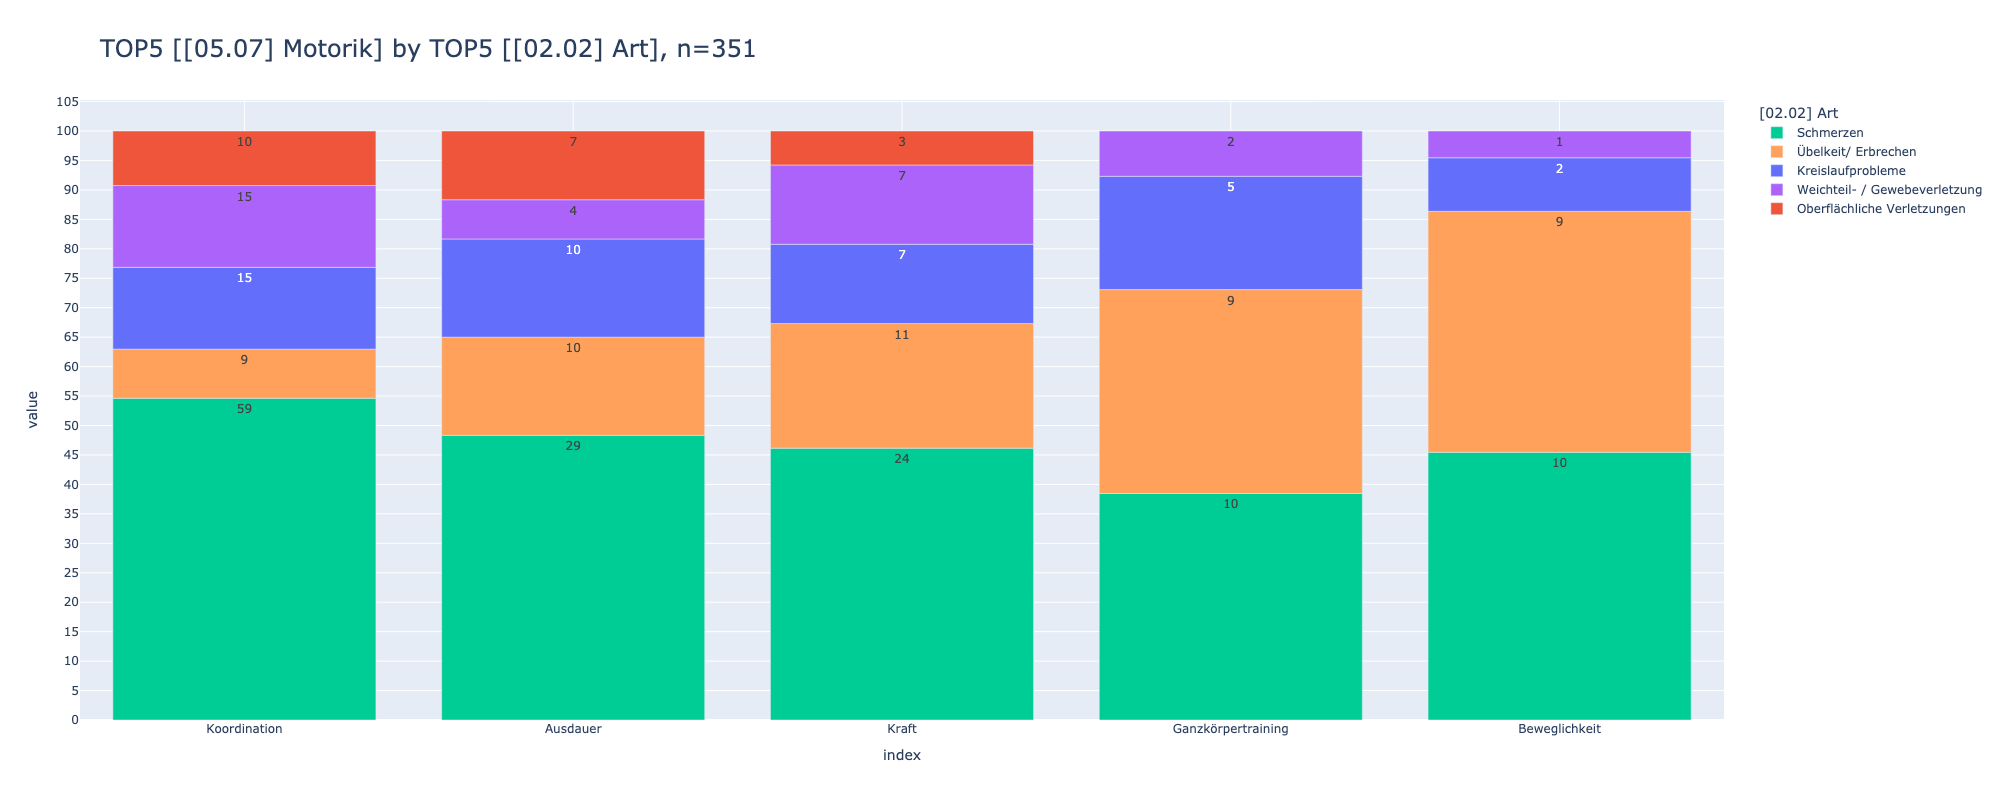

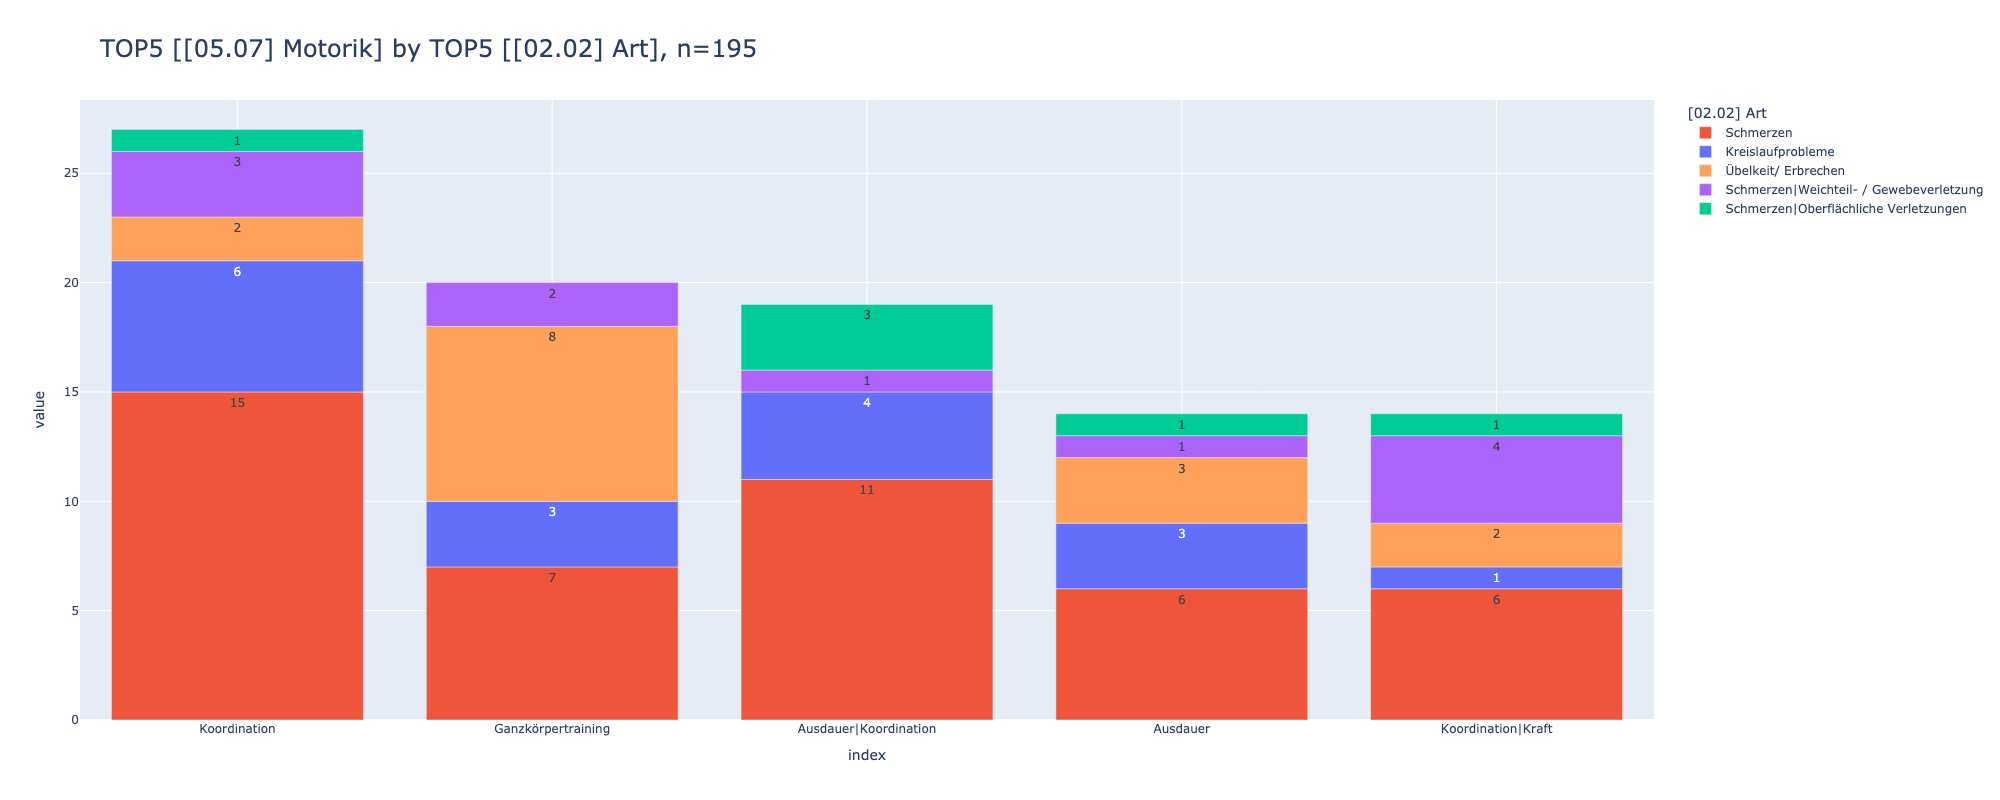

In [9]:
slide1=df_slides.find_cols(["[05.07]","[02.02]"])
create_multi_chart(df_slides[slide1])

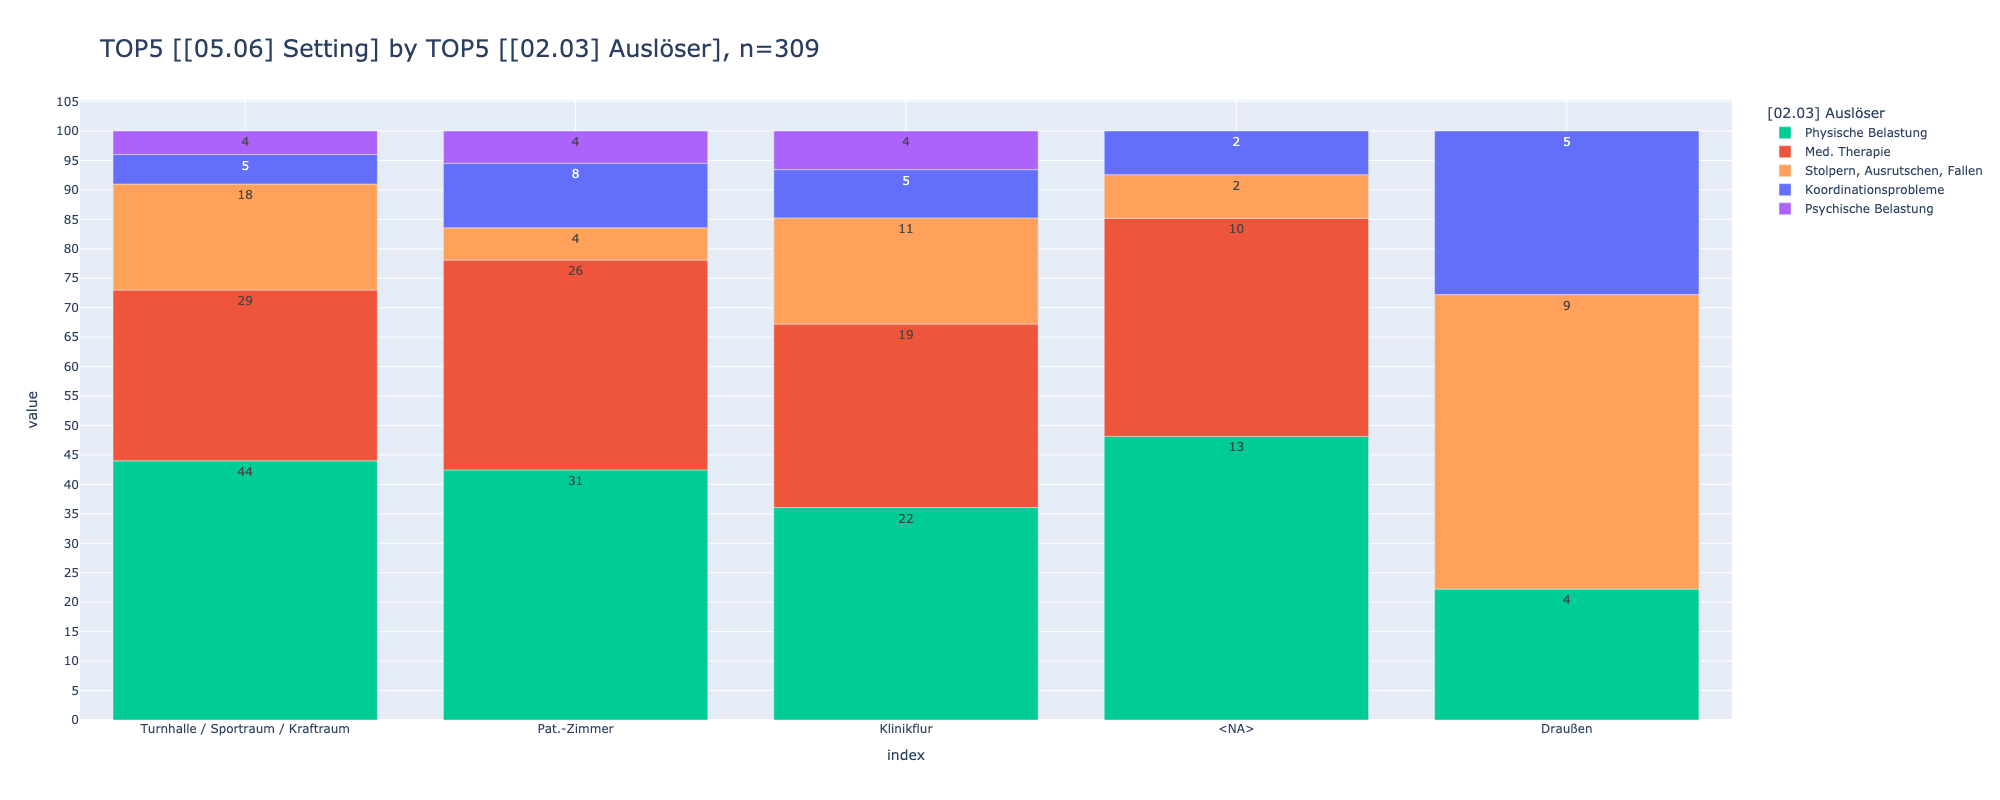

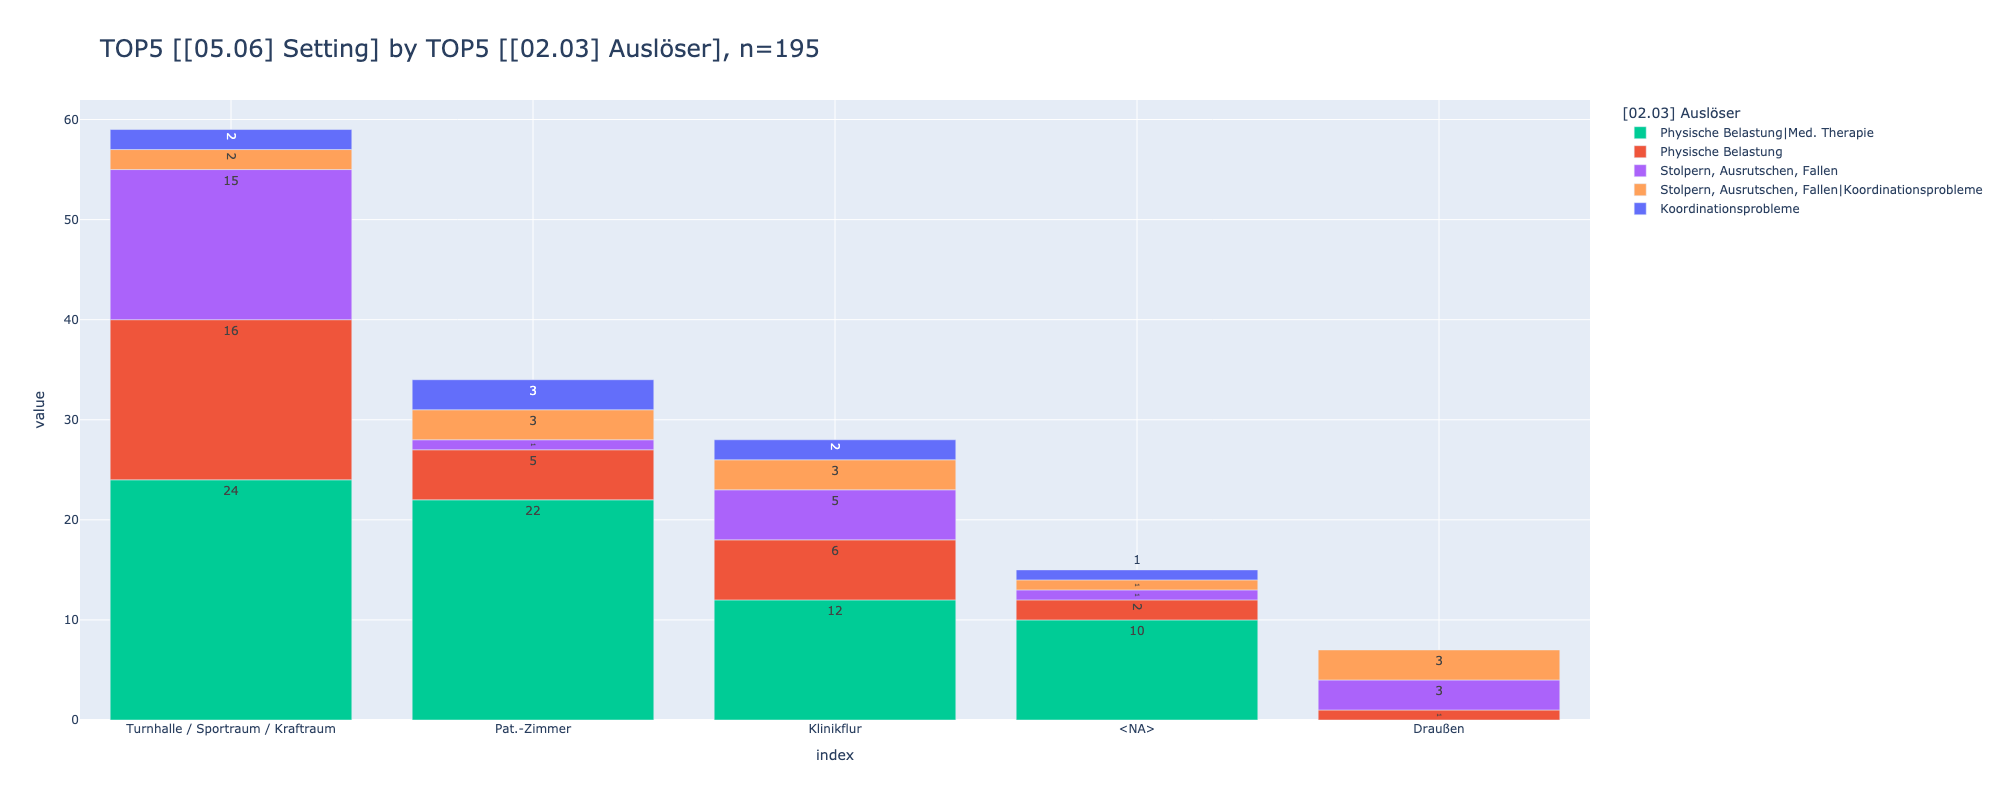

In [10]:
slide2=df_slides.find_cols(["[05.06]","[02.03]"])
create_multi_chart(df_slides[slide2])

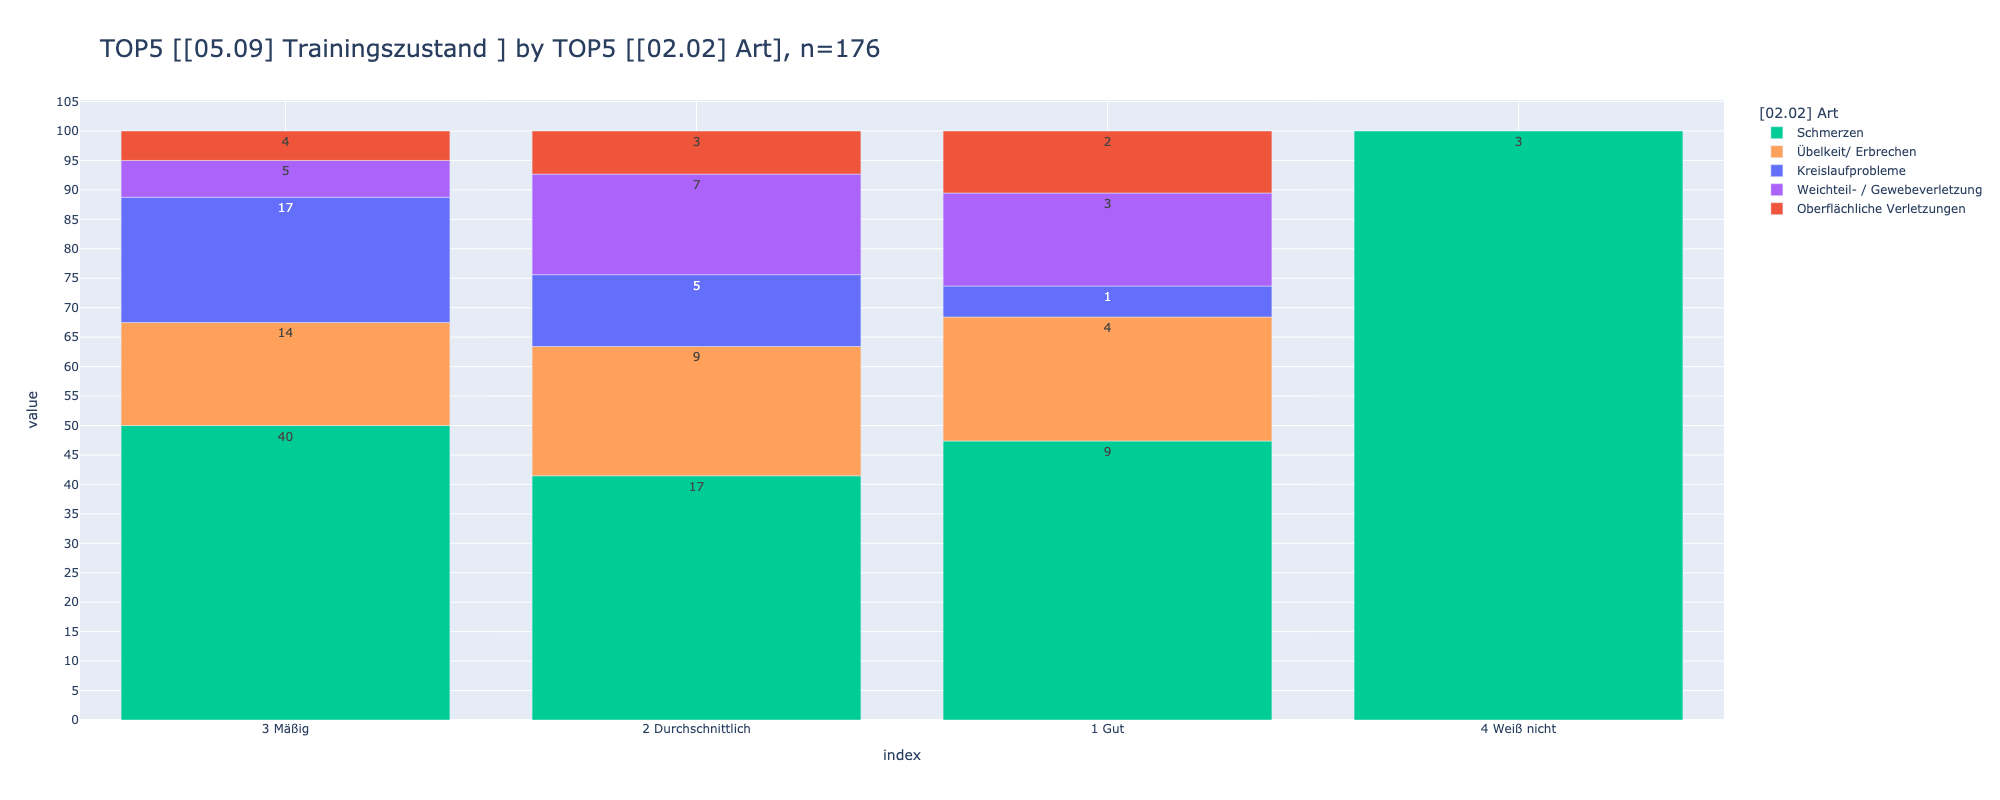

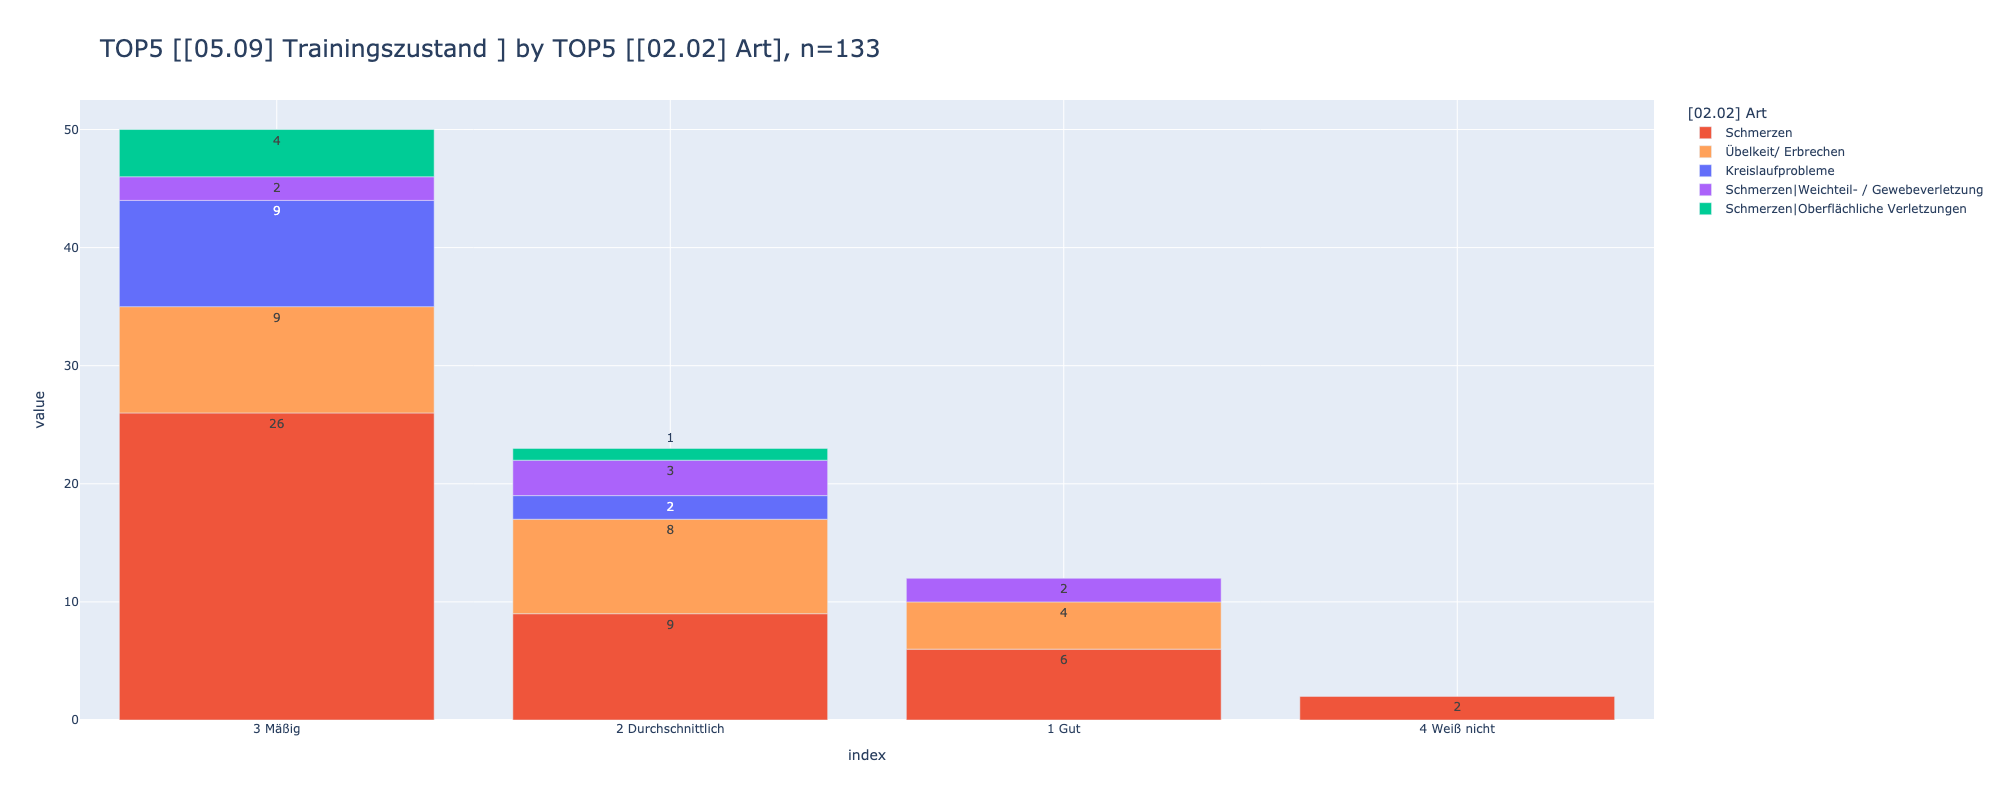

In [11]:
slide3=df_slides.find_cols(["[05.09]","[02.02]"])
_df = df_slides[slide3]
_df = _df[(~_df.iloc[:,1].str.contains('5')) & (_df.iloc[:,1].str[0] != '-')]
create_multi_chart(_df)
#_df